In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Utils,np,pd
from Knn import Knn
import importlib

Read the Data

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Feature engineering, data cleaning

In [8]:
df.drop(['id','zipcode'],axis=1,inplace=True)

In [9]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing data

Grabbing Year of the date

In [11]:
df['date_yr'] = df['date'].apply(lambda x: str(x)[:4])
df.drop('date',axis=1,inplace=True)

In [12]:
df['date_yr'] = df['date_yr'].apply(lambda x: int(x))

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,date_yr
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015


<h1>Correlation of columns</h1>

<AxesSubplot:>

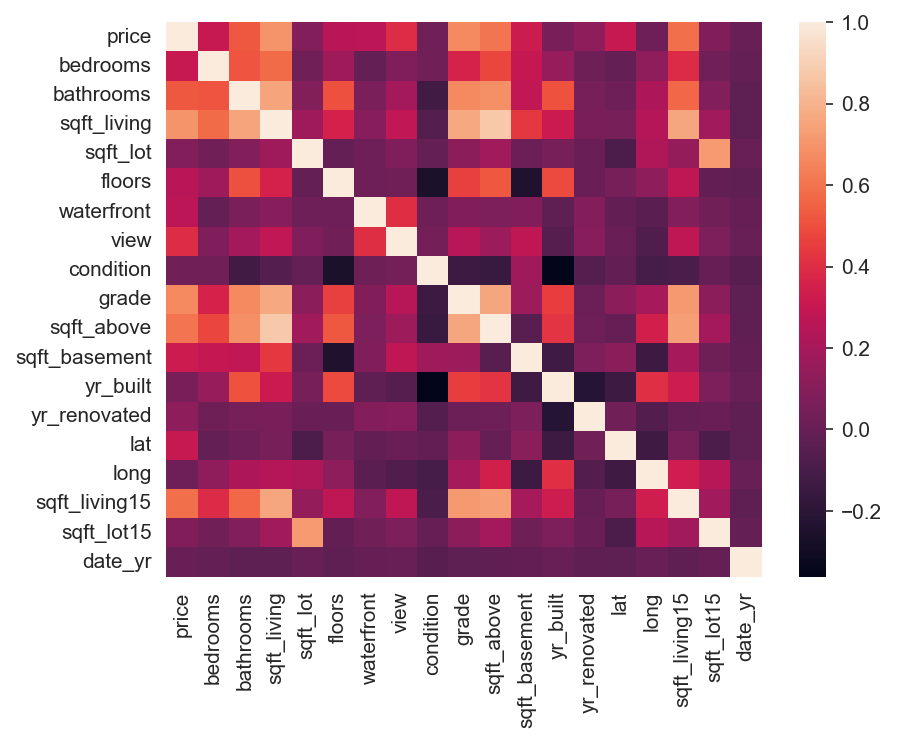

In [14]:
plt.figure(dpi=150)
sns.heatmap(df.corr())

In [15]:
corr_df = df.corr()['price'].sort_values().iloc[:-1]

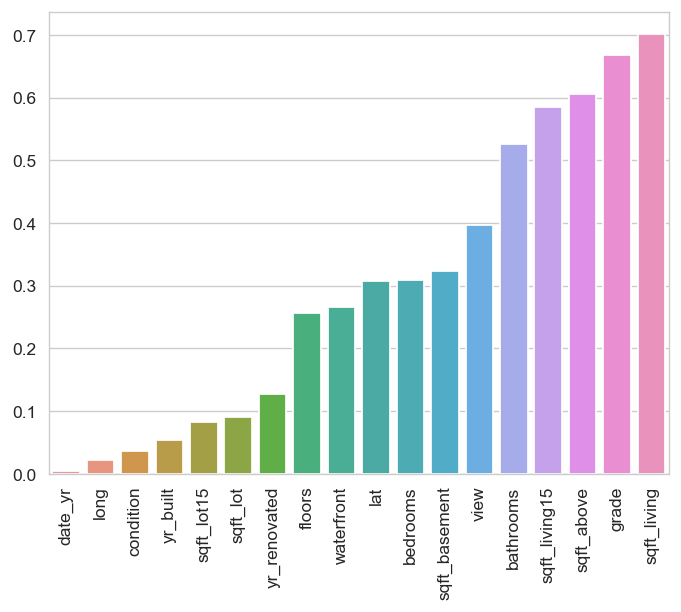

In [16]:
plt.figure(dpi=125)
sns.barplot(x=corr_df.index,y=corr_df.values)
plt.xticks(rotation=90);

Condition,yr_built,sqft_lot15,sqft_lot,yr_renovated have all around 0.1 correlation with price which is very low we could get rid of these columns if we want to speed up our model later

<h1>Dealing with outliers from most correlated columns</h1>

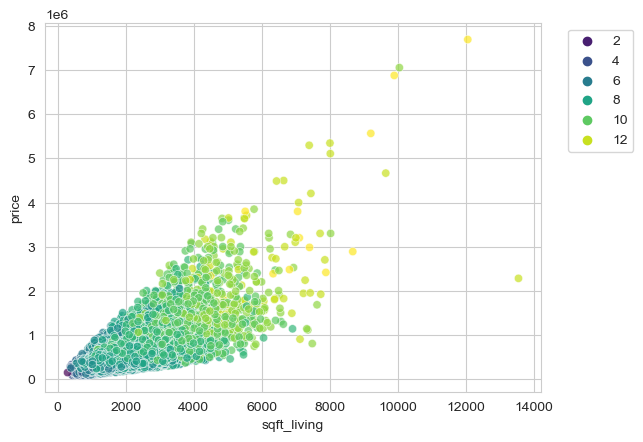

In [17]:
sns.scatterplot(data=df,x='sqft_living',y='price',hue='grade',alpha=0.7,palette='viridis')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [18]:
df.drop(df[df['price']>2000000].index,inplace=True)

In [19]:
df.drop(df[df['sqft_living'] >= 8000].index,inplace=True)

<AxesSubplot:xlabel='grade', ylabel='count'>

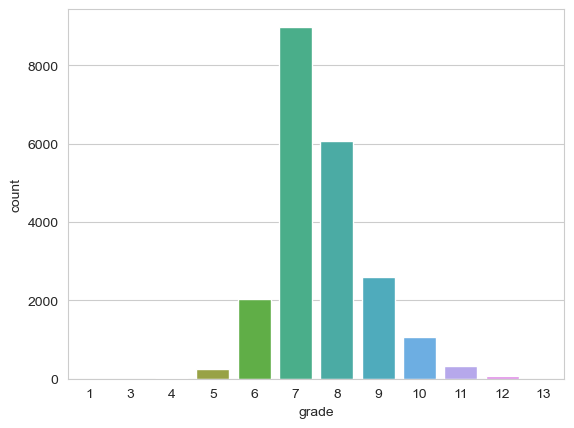

In [20]:
sns.countplot(data=df,x='grade')

Removing grades which only occur a few times

In [21]:
remove = list(df['grade'].value_counts().sort_values()[:4].index)
remove

[13, 1, 3, 4]

In [22]:
df.drop(df[df['grade'].isin(remove)].index,inplace=True)

Deleting outlier from sqft_above

<AxesSubplot:ylabel='sqft_above'>

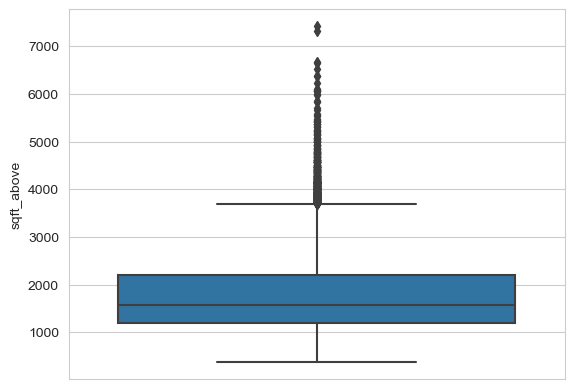

In [23]:
sns.boxplot(data=df,y='sqft_above')

In [24]:
df.drop(df[df['sqft_above'] > 7000].index,inplace=True)

<AxesSubplot:ylabel='sqft_living15'>

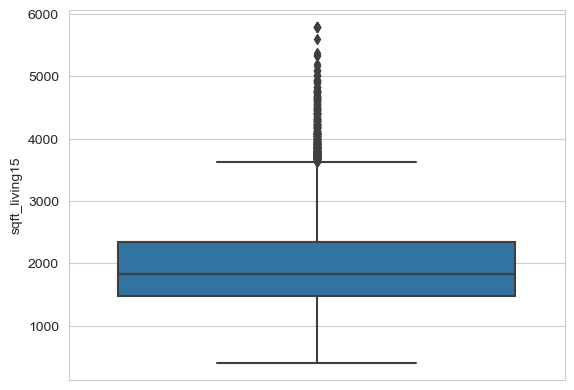

In [25]:
sns.boxplot(data=df,y='sqft_living15')

In [26]:
sum(df['bathrooms'] == 0)

7

In [27]:
df.drop(df[df['bathrooms']==0].index,inplace=True)

Removing houses with 0 bathrooms

<h1>Checking possible patterns</h1>

<AxesSubplot:xlabel='view', ylabel='price'>

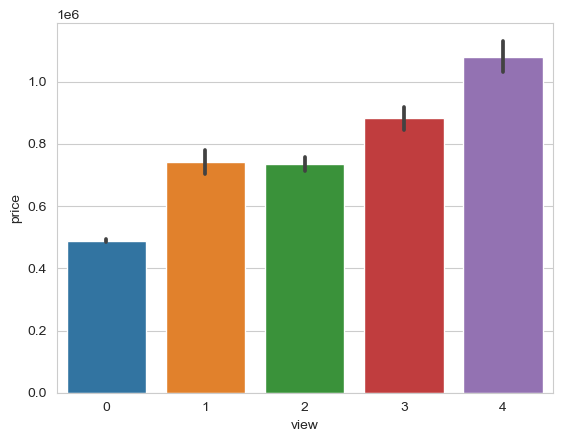

In [28]:
sns.barplot(data=df,x='view',y='price')

Houses with view of 4 have way higher price compared to other possible view values

<AxesSubplot:xlabel='condition', ylabel='price'>

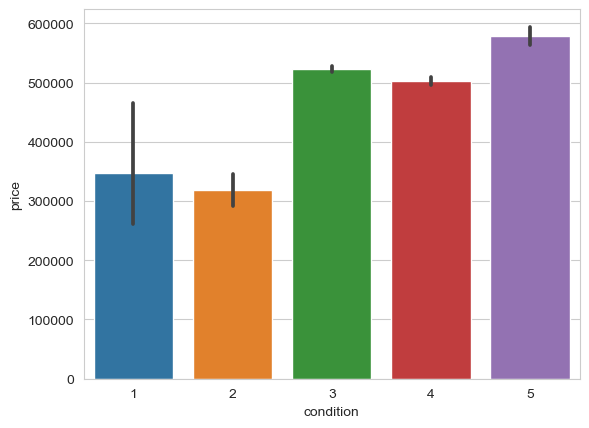

In [29]:
sns.barplot(data=df,x='condition',y='price')

Houses with condition >= 3 have higher mean price

In [30]:
sum(df['yr_renovated'])

1758303

Many houses have not been renovated so we can just group houses to 2 classes renovated and not renovated ignoring when the renovation happened

In [31]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x!=0 else 0)

In [32]:
df.drop('yr_renovated',axis=1,inplace=True)

<AxesSubplot:xlabel='renovated', ylabel='price'>

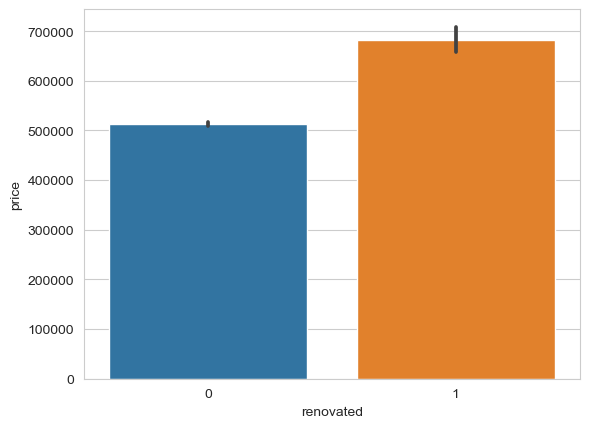

In [33]:
sns.barplot(data=df,x='renovated',y='price')

we see that if a building was renovated the price of it will be higher

In [34]:
df['floors'].value_counts()

1.0    10613
2.0     8106
1.5     1896
3.0      608
2.5      143
3.5        6
Name: floors, dtype: int64

In [35]:
df.drop(df[df['floors'] == 3.5].index,inplace=True)

Removing houses with floors 3.5 which we have only 7 records of in the dataset

<h1>Data Preparation</h1>

In [36]:
X = df.drop('price',axis=1)
y = df['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=92)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<h1>Models</h1>

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
def describe_model(model,scaled=False):
    if scaled:
        pred = model.predict(scaled_X_test)
    else:
        pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, pred)
    RMSE = np.sqrt(mean_squared_error(y_test, pred))
    print(f'MAE: {MAE},\nRMSE: {RMSE}')

In [39]:
def cv_knn(df,ks,ms):
    length = int(len(df)/5)
    stats = {}
    for k in ks:
        for m in ms:
            errors = []
            for c in range(5):
                fold_start = c*length
                fold_end = (c+1)*length
                test = df.iloc[fold_start:fold_end]
                train = df.iloc[:fold_start] + df[fold_end:]
                knn_model = Knn(k,m)
                knn_model.fit(train,y='price')
                pred = knn_model.predict(test)
                error = knn_model.accuracy(test, pred)
                errors.append(error)
            stats[f'k={k},m={m}'] = np.mean(errors)
    return stats

<h2>Our knn model</h2>

In [40]:
knn_model = Knn()
df = Utils.standardize(df, 'price')
df = Utils.shuffle(df)
train, test = Utils.split(df, 0.9)
knn_model.fit(train, y='price')
pred = knn_model.predict(test)

In [ ]:
knn_model.accuracy(test, pred)

<h2>Decision Tree</h2>

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
describe_model(tree_model)

MAE: 89330.41413196069,
RMSE: 139102.91290689577


In [ ]:
tree_model = DecisionTreeRegressor()
params = {'max_depth': [5,7,9,11,None]}
grid_tree_model = GridSearchCV(estimator=tree_model,param_grid=params,verbose=2,cv=10)
grid_tree_model.fit(X_train,y_train)
describe_model(grid_tree_model)

<h2>Random Forest</h2>

In [108]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train,y_train)
describe_model(rand_forest_model)

MAE: 60987.636010194525,
RMSE: 99166.18025989612


<h2>Random Forest GridSearchCV</h2>

In [ ]:
rand_forest = RandomForestRegressor()
params = {'max_depth':[5,10,None],
          'max_features':['auto','sqrt'],
          'n_estimators':[100,200]}
rand_forest_cv = GridSearchCV(estimator=rand_forest,param_grid=params,verbose=2,cv=5)
rand_forest_cv.fit(X_train,y_train)

In [ ]:
grid_tree_model.best_estimator_

In [ ]:
describe_model(grid_tree_model)

<h2>Gradient Boosting</h2>

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_model = GradientBoostingRegressor(learning_rate=1)
gradient_model.fit(X_train,y_train)
describe_model(gradient_model)

MAE: 68416.98161830648,
RMSE: 104752.60773776971


In [ ]:
gradient_model = GradientBoostingRegressor()
params = {'learning_rate':[0.1,0.5,0.01,1],
          'max_features':['sqrt','log2']}
gradient_grid_model = GridSearchCV(estimator=gradient_model,param_grid=params,verbose=2)
gradient_grid_model.fit(X_train,y_train)
describe_model(gradient_grid_model)

In [ ]:
gradient_grid_model.best_estimator_

In [ ]:
describe_model(gradient_grid_model)

<h2>KNN</h2>

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
knn_model = KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')
knn_model.fit(scaled_X_train,y_train)
describe_model(knn_model,True)

MAE: 76410.14498459054,
RMSE: 120712.1010903534


In [ ]:
knn_model = KNeighborsRegressor()
params = {'n_neighbors':[3,5,7,9],
          'weights':['uniform','distance'],
          'p':[1,2]}
grid_knn_model = GridSearchCV(estimator=knn_model,param_grid=params,verbose=2)
grid_knn_model.fit(scaled_X_train,y_train)
describe_model(grid_knn_model,True)

In [ ]:
grid_knn_model.best_estimator_

<h2>Our CrossValidation</h2>

In [43]:
def cv_knn(df,ks,m):
    length = int(len(df)/5)
    stats = {}
    for k in ks:
        maes = []
        rmses = []
        for c in range(5):
            fold_start = c*length
            fold_end = (c+1)*length
            test = df.iloc[fold_start:fold_end]
            X_test = test.drop('price',axis=1)
            y_test = test['price']
            train = pd.concat([df.iloc[:fold_start],df[fold_end:]])
            X_train = train.drop('price',axis=1)
            y_train = train['price']
            knn_model = KNeighborsRegressor(n_neighbors=k,p=m)
            knn_model.fit(X_train,y_train)
            pred = knn_model.predict(X_test)
            mae = mean_absolute_error(y_test, pred)
            maes.append(mae)
            rmse = np.sqrt(mean_squared_error(y_test,pred))
            rmses.append(rmse)
        stats[k] = [np.mean(maes),np.mean(rmses)]
    return stats

In [44]:
ks = [x for x in range(1,30,2)]

In [45]:
df = Utils.standardize(df,'price')

In [46]:
stats = cv_knn(df,ks,1)
mae = [x[0] for x in stats.values()]
rmse = [x[1] for x in stats.values()]

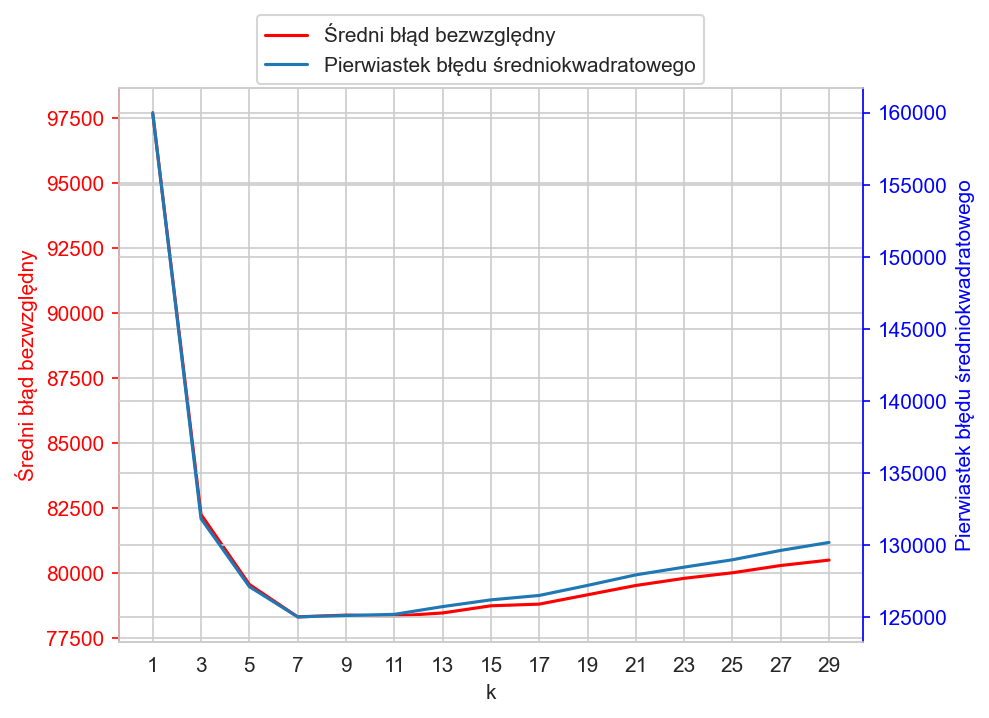

In [118]:
fig, ax = plt.subplots(dpi=150)
ax.set_xticks([x for x in range(1,30,2)])
ax.set_xlabel("k")
line1 = ax.plot(stats.keys(),mae,color='red',label='Średni błąd bezwzględny')
ax.set_ylabel("Średni błąd bezwzględny",color='red')
ax.spines['left'].set_color('red')
ax.tick_params(axis='y',colors='red')
ax2 = plt.twinx()
line2 = ax2.plot(stats.keys(),rmse,label='Pierwiastek błędu średniokwadratowego')
ax2.set_ylabel("Pierwiastek błędu średniokwadratowego",color='blue')
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y',colors='blue')
lns = line1+line2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs,bbox_to_anchor=(0.8,1.15))
plt.show()

In [47]:
stats_2 = cv_knn(df,ks,2)
mae2 = [x[0] for x in stats_2.values()]
rmse2 = [x[1] for x in stats_2.values()]

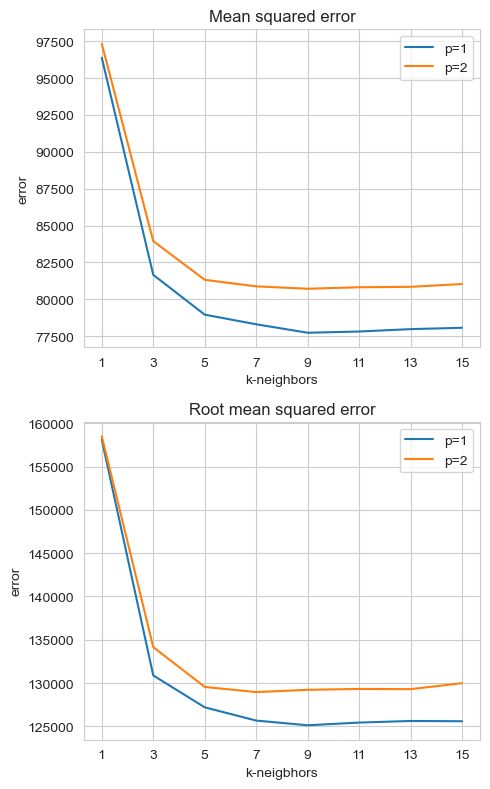

In [48]:
fig, ax = plt.subplots(nrows=2,figsize=(5,8))
ax[0].plot([x for x in range(1,16,2)],mae[:8],label='p=1')
ax[0].plot([x for x in range(1,16,2)],mae2[:8], label='p=2')
ax[0].set_title("Mean squared error")
ax[0].set_ylabel('error')
ax[0].set_xlabel('k-neighbors')
ax[1].plot([x for x in range(1,16,2)],rmse[:8],label='p=1')
ax[1].plot([x for x in range(1,16,2)],rmse2[:8], label='p=2')
ax[1].set_title("Root mean squared error")
ax[1].set_ylabel('error')
ax[1].set_xlabel('k-neigbhors')
ax[0].legend()
ax[1].legend()
ax[0].set_xticks([x for x in range(1,16,2)])
ax[1].set_xticks([x for x in range(1,16,2)])
plt.tight_layout()

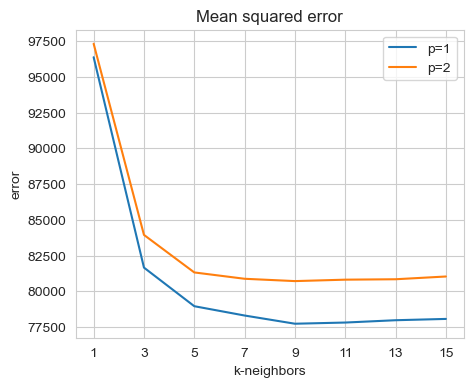

In [58]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot([x for x in range(1,16,2)],mae[:8],label='p=1')
ax.plot([x for x in range(1,16,2)],mae2[:8], label='p=2')
ax.set_title("Mean squared error")
ax.set_ylabel('error')
ax.set_xlabel('k-neighbors')
ax.legend()
ax.set_xticks([x for x in range(1,16,2)]);

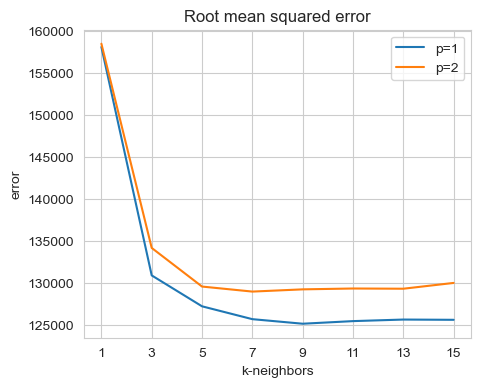

In [59]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot([x for x in range(1,16,2)],rmse[:8],label='p=1')
ax.plot([x for x in range(1,16,2)],rmse2[:8], label='p=2')
ax.set_title("Root mean squared error")
ax.set_ylabel('error')
ax.set_xlabel('k-neighbors')
ax.legend()
ax.set_xticks([x for x in range(1,16,2)]);

<h2>Polynomial Regression</h2>

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X = df.drop('price', axis=1)
X_poly = poly_features.fit_transform(X)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=92)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linear_model = LinearRegression()
linear_model.fit(scaled_X_train,y_train)
describe_model(linear_model,True)

mean value of price 519727.4608256108
MAE: 91081.23294864845,
RMSE: 129241.64895201776
r2_score: 0.7876915139939452


In [109]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(scaled_X_train,y_train)
describe_model(linear_model,True)

MAE: 105855.72279609929,
RMSE: 149260.54916739344
